# Database Scrapping

In [2]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sqlalchemy import create_engine

In [3]:
connection_string = "mysql+mysqlconnector://root:@localhost/car_sales"

In [4]:
engine = create_engine(connection_string)

In [5]:
df = pd.read_sql("SELECT * FROM used_car_listings", engine)

# Data Exploration

In [6]:
df.head()

,listing_id,vin,make,model,year,trim,body_type,fuel_type,transmission,mileage,price,condition,location,seller_type,features
0,1,9M6LF68V634LY2252,Tesla,Model 3,2019,,Coupe,Electric,Manual,46134,19919.0,good,"New Lindsey, GA, US",Dealer,"Alloy Wheels, Android Auto, Apple CarPlay, Fog..."
1,2,1S0ZCY536BSCY2864,Nissan,Rogue,2024,LT,Sedan,Hybrid,Automatic,16109,19480.0,good,"Pughtown, CO, US",Dealer,"Alloy Wheels, Android Auto, Lane Keep Assist, ..."
2,3,YFB625BN0RTMZ5590,Hyundai,i20,2018,XLE,Crossover,Petrol,Automatic,173239,4556.0,good,"Satna, HR, India",Dealer,"Alloy Wheels, Bluetooth, Panoramic Roof, Sunroof"
3,4,CPMZ4RFN5WYL37096,Kia,Sportage,2023,EX,Hatchback,Diesel,CVT,36810,11536.0,fair,"山武市, Osaka, Japan",Certified Pre-Owned,"Alloy Wheels, Bluetooth, Keyless Entry, Naviga..."
4,5,4PJZG3MV6D9365673,Kia,Seltos,2020,Trend,Pickup,Diesel,Automatic,87749,14098.0,good,"長生郡長生村, Osaka, Japan",Certified Pre-Owned,"Apple CarPlay, Backup Camera, Bluetooth, Heate..."


In [7]:
df.tail()

,listing_id,vin,make,model,year,trim,body_type,fuel_type,transmission,mileage,price,condition,location,seller_type,features
2063,2064,06B83BVF8F2W81547,Skoda,Kushaq,2023,Sport,Pickup,Petrol,Automatic,24566,34696.0,like new,"Shahjahanpur, KA, India",Certified Pre-Owned,"Blind Spot Monitor, Keyless Entry, Panoramic R..."
2064,2065,4P7083L79MBVK5696,Mahindra,Scorpio,2016,XSE,SUV,Diesel,Automatic,122459,2642.0,excellent,"Marques, PR, Brazil",Dealer,"Adaptive Cruise Control, Backup Camera, LED He..."
2065,2066,5RERFW1M7B00A4061,Audi,A6,2018,EX,Hatchback,Diesel,DCT,120452,7093.0,good,"Dhanbad, KL, India",Private Party,"Adaptive Cruise Control, Android Auto, Blind S..."
2066,2067,DJB6DBAS5UNNX0757,Skoda,Kushaq,2021,LX,MPV,Petrol,Manual,57043,11296.0,excellent,"Caitlinstad, NL, Canada",Certified Pre-Owned,"Backup Camera, Panoramic Roof, Parking Sensors..."
2067,2068,8BUANECR64R9L0827,Chevrolet,Malibu,2024,Platinum,Sedan,Diesel,Automatic,20218,23558.0,excellent,"Stadtroda, HH, Germany",Certified Pre-Owned,"Adaptive Cruise Control, Android Auto, Apple C..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   listing_id    2068 non-null   int64  
 1   vin           2068 non-null   object 
 2   make          2068 non-null   object 
 3   model         2068 non-null   object 
 4   year          2068 non-null   int64  
 5   trim          2068 non-null   object 
 6   body_type     2068 non-null   object 
 7   fuel_type     2068 non-null   object 
 8   transmission  2068 non-null   object 
 9   mileage       2068 non-null   int64  
 10  price         2068 non-null   float64
 11  condition     2068 non-null   object 
 12  location      2068 non-null   object 
 13  seller_type   2068 non-null   object 
 14  features      2068 non-null   object 
dtypes: float64(1), int64(3), object(11)
memory usage: 242.5+ KB


In [9]:
df.describe()

,listing_id,year,mileage,price
count,2068.000000,2068.000000,2068.000000,2068.000000
mean,1034.500000,2016.975822,115626.364603,9182.621857
std,597.124498,4.610981,80971.112603,9964.093618
min,1.000000,2005.000000,0.000000,1140.000000
25%,517.750000,2014.000000,57683.250000,2323.750000
50%,1034.500000,2017.000000,99212.000000,5448.500000
75%,1551.250000,2020.000000,159291.500000,11946.750000
max,2068.000000,2025.000000,418428.000000,72641.000000


In [10]:
df.shape

(2068, 15)

# Data Preprocessing

## Duplication Check

In [11]:
df.duplicated().sum()

np.int64(0)

## Filling Nulls

In [12]:
df.isnull().sum()
# ok no null found

listing_id      0
vin             0
make            0
model           0
year            0
trim            0
body_type       0
fuel_type       0
transmission    0
mileage         0
price           0
condition       0
location        0
seller_type     0
features        0
dtype: int64

In [13]:
df.dtypes

listing_id        int64
vin              object
make             object
model            object
year              int64
trim             object
body_type        object
fuel_type        object
transmission     object
mileage           int64
price           float64
condition        object
location         object
seller_type      object
features         object
dtype: object

### listing_id & vin

In [14]:
len(df['listing_id'].unique())

2068

In [15]:
len(df['vin'].unique())

2068

In [16]:
# There is 2 primiary keys so lets drop one
df= df.drop('vin', axis=1)

### make             

In [17]:
df['make'].unique()

array(['Tesla', 'Nissan', 'Hyundai', 'Kia', 'Mercedes-Benz', 'Tata',
       'Chevrolet', 'Toyota', 'Skoda', 'Audi', 'Honda', 'Ford', 'Maruti',
       'BMW', 'Volkswagen', 'Mahindra'], dtype=object)

In [18]:
df['make'].value_counts()
# Ok no one value has an extreme num

make
Ford             146
Skoda            145
Audi             142
Mahindra         136
Chevrolet        135
Kia              133
Nissan           128
Honda            128
Mercedes-Benz    127
Tata             126
BMW              125
Hyundai          124
Volkswagen       123
Tesla            117
Maruti           117
Toyota           116
Name: count, dtype: int64

### model 

In [19]:
df['model'].unique()

array(['Model 3', 'Rogue', 'i20', 'Sportage', 'Seltos', 'GLA', 'Sorento',
       'Altroz', 'Silverado', 'Camry', 'Octavia', 'Malibu', 'Nexon', 'A6',
       'Accord', 'F-150', 'Dzire', 'Sonet', 'Maverick', 'A4', '3 Series',
       'Q3', 'Highlander', '5 Series', 'Equinox', 'Taigun', 'Model Y',
       'Magnite', 'Bolero', 'Creta', 'Trax', 'Kushaq', 'Tacoma', 'XUV700',
       'Explorer', 'X5', 'Slavia', 'Escape', 'CR-V', 'Q5', 'Punch',
       'E-Class', 'Ertiga', 'Jetta', 'Scorpio', 'Tucson', 'City',
       'Wagon R', 'Tiguan', 'Baleno', 'Swift', 'Civic', 'RAV4', 'Harrier',
       'GLC', 'X3', 'Sentra', 'Sonata', 'Amaze', 'Altima', 'Innova',
       'Corolla', 'C-Class', 'Fortuner', 'Elantra'], dtype=object)

### year             

In [20]:
df['year'].unique()

array([2019, 2024, 2018, 2023, 2020, 2013, 2017, 2015, 2014, 2011, 2025,
       2016, 2021, 2022, 2012, 2006, 2007, 2010, 2009, 2005, 2008])

In [21]:
df['year'].dtype

dtype('int64')

### trim

In [22]:
df['trim'].unique()
# has hidden null values

array(['', 'LT', 'XLE', 'EX', 'Trend', 'Platinum', 'Long Range', 'LX',
       'Premium', 'LTZ', 'Touring', 'XSE', 'Limited', 'Sport',
       'Performance', 'Base', 'L', 'Titanium', 'SE', 'LE'], dtype=object)

In [23]:
df['trim']= df['trim'].replace('', np.nan)

In [24]:
df['trim'].isnull().sum() / len(df) * 100
# ok low percentage will be filled

np.float64(11.798839458413926)

In [25]:
df['trim'].value_counts()

trim
Touring        113
LX             109
Titanium       104
Sport          102
Long Range     102
Base           101
LTZ             99
Trend           98
Platinum        96
EX              96
LE              96
Limited         94
SE              93
Performance     91
Premium         88
L               88
LT              87
XSE             84
XLE             83
Name: count, dtype: int64

In [26]:
df['trim']= df['trim'].fillna(df['trim'].mode()[0])

In [27]:
df['trim'].isnull().sum()

np.int64(0)

### body_type             

In [28]:
df['body_type'].unique()

array(['Coupe', 'Sedan', 'Crossover', 'Hatchback', 'Pickup',
       'Convertible', 'Van', 'MPV', 'SUV'], dtype=object)

### fuel_type             

In [29]:
df['fuel_type'].unique()

array(['Electric', 'Hybrid', 'Petrol', 'Diesel', 'Plug-in Hybrid', 'CNG'],
      dtype=object)

### transmission             

In [30]:
df['transmission'].unique()

array(['Manual', 'Automatic', 'CVT', 'AMT', 'DCT'], dtype=object)

### mileage

In [31]:
df['mileage'].unique()

array([ 46134,  16109, 173239, ..., 120452,  57043,  20218], shape=(1964,))

In [32]:
df['mileage'].dtype

dtype('int64')

### price

In [33]:
df['price'].unique()

array([19919., 19480.,  4556., ...,  7093., 11296., 23558.], shape=(1883,))

In [34]:
df['price'].dtype

dtype('float64')

### condition

In [35]:
df['condition'].unique()

array(['good', 'fair', 'excellent', 'new', '', 'like new', 'salvage'],
      dtype=object)

In [36]:
df['condition']= df['condition'].replace('', np.nan)

In [37]:
df['condition'].isnull().sum()

np.int64(46)

In [38]:
df['condition']= df['condition'].fillna(df['condition'].mode()[0])

### location

In [39]:
df['location'].unique()

array(['New Lindsey, GA, US', 'Pughtown, CO, US', 'Satna, HR, India', ...,
       'Dhanbad, KL, India', 'Caitlinstad, NL, Canada',
       'Stadtroda, HH, Germany'], shape=(1893,), dtype=object)

In [40]:
df['location'].head(10)

0             New Lindsey, GA, US
1                Pughtown, CO, US
2                Satna, HR, India
3               山武市, Osaka, Japan
4            長生郡長生村, Osaka, Japan
5     Christopherfort, NB, Canada
6     West Susanburgh, NB, Canada
7     Perrot-sur-Mer, NAQ, France
8     Lake Taylor, TAS, Australia
9    Mckenzieside, TAS, Australia
Name: location, dtype: object

In [41]:
df['location'].tail(10)

2058     Gutierrezburgh, VIC, Australia
2059               青ヶ島村, Fukuoka, Japan
2060                  羽村市, Kyoto, Japan
2061    Bhalswa Jahangir Pur, UP, India
2062                  杉並区, Tokyo, Japan
2063            Shahjahanpur, KA, India
2064                Marques, PR, Brazil
2065                 Dhanbad, KL, India
2066            Caitlinstad, NL, Canada
2067             Stadtroda, HH, Germany
Name: location, dtype: object

In [42]:
# ok lets get the country out of that
df['country'] = df['location'].str.split(',').str[-1].str.strip()

In [43]:
df['country'].value_counts()

country
Australia       228
France          215
Japan           213
India           212
Germany         206
South Africa    205
Brazil          203
UK              203
Canada          192
US              191
Name: count, dtype: int64

In [44]:
df= df.drop('location', axis= 1)

### seller_type

In [45]:
df['seller_type'].unique()

array(['Dealer', 'Certified Pre-Owned', 'Private Party'], dtype=object)

In [46]:
df['seller_type'].value_counts()

seller_type
Dealer                 1151
Private Party           706
Certified Pre-Owned     211
Name: count, dtype: int64

### features

In [47]:
df['features'].unique()

array(['Alloy Wheels, Android Auto, Apple CarPlay, Fog Lights, LED Headlights, Parking Sensors, Ventilated Seats',
       'Alloy Wheels, Android Auto, Lane Keep Assist, Navigation, Panoramic Roof, Parking Sensors, Push Button Start, Wireless Charging',
       'Alloy Wheels, Bluetooth, Panoramic Roof, Sunroof', ...,
       'Adaptive Cruise Control, Android Auto, Blind Spot Monitor, Navigation, Wireless Charging',
       'Backup Camera, Panoramic Roof, Parking Sensors, Push Button Start',
       'Adaptive Cruise Control, Android Auto, Apple CarPlay, Bluetooth, Fog Lights, Heated Seats, LED Headlights'],
      shape=(1904,), dtype=object)

In [48]:
from collections import Counter

In [49]:
all_features = []
for feature_string in df['features'].dropna():
    if isinstance(feature_string, str):
        features = [f.strip() for f in feature_string.split(',')]
        features = [f for f in features if f != '']
        all_features.extend(features)

# Count feature frequency
feature_counts = Counter(all_features)

In [50]:
len(feature_counts)

20

In [51]:
feature_counts

Counter({'Android Auto': 649,
         'Fog Lights': 643,
         'Wireless Charging': 642,
         'Leather Seats': 640,
         'Backup Camera': 639,
         'Sunroof': 638,
         'Heated Seats': 638,
         'Alloy Wheels': 636,
         'Navigation': 633,
         'Panoramic Roof': 632,
         'Ventilated Seats': 630,
         'Push Button Start': 626,
         'Apple CarPlay': 625,
         'Parking Sensors': 622,
         'Adaptive Cruise Control': 611,
         'LED Headlights': 608,
         'Bluetooth': 600,
         'Lane Keep Assist': 599,
         'Keyless Entry': 589,
         'Blind Spot Monitor': 585})

In [52]:
important_features = [
    'Backup Camera', 'Navigation', 'Leather Seats', 
    'Sunroof', 'Wireless Charging', 'Bluetooth', 'Parking Sensors'
]

In [53]:
for feature in important_features:
    col_name = f'has_{feature.lower().replace(" ", "_")}'
    df[col_name] = df['features'].str.contains(feature, na=False).astype(int)

In [54]:
df= df.drop('features', axis= 1)

## Correlation Check

In [55]:
numeric= list(df.describe().columns)
numeric.remove('listing_id')
numeric

['year',
 'mileage',
 'price',
 'has_backup_camera',
 'has_navigation',
 'has_leather_seats',
 'has_sunroof',
 'has_wireless_charging',
 'has_bluetooth',
 'has_parking_sensors']

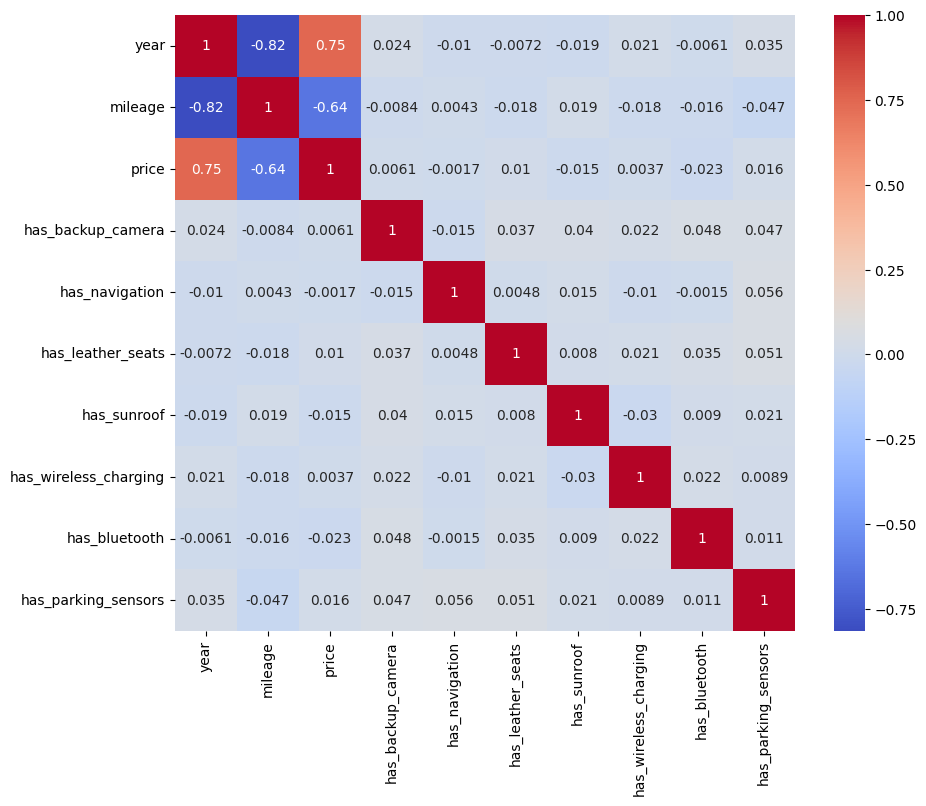

In [56]:
plt.figure(figsize= (10, 8))
sns.heatmap(df[numeric].corr(), cmap="coolwarm", annot= True)
plt.show()

## Outliers Check

In [57]:
def find_outliers_iqr(data):
    outliers= []
    for col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        if (data[col] < lower_bound).any() | (data[col] > upper_bound).any():
            outliers.append(col)
    return outliers

In [58]:
outliers_columns= find_outliers_iqr(df[numeric])
outliers_columns

['mileage', 'price']

In [59]:
def outliers_values(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
    return outliers

In [60]:
def get_bounds(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    return lower_bound, upper_bound

### mileage

<Axes: ylabel='mileage'>

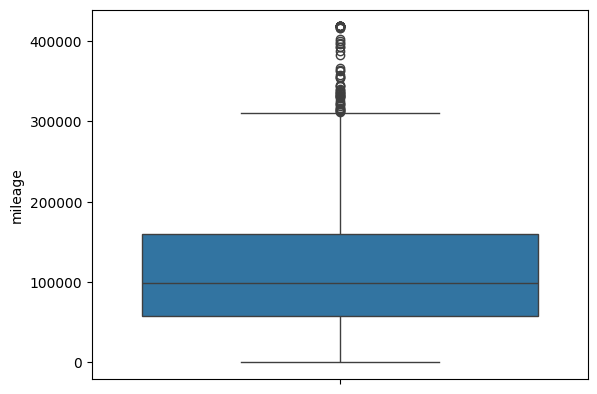

In [61]:
sns.boxplot(df['mileage'])

<Axes: >

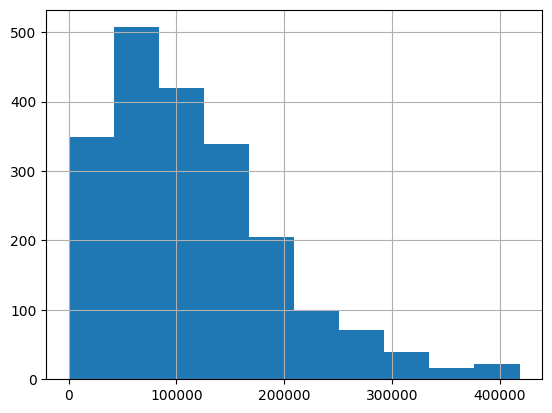

In [62]:
df['mileage'].hist()
# left skewed

In [63]:
outliers= outliers_values(df, 'mileage')
len(outliers)

57

In [64]:
low, high= get_bounds(df, 'mileage')
high

np.float64(311703.875)

In [65]:
df['mileage'].max()

np.int64(418428)

### Price

<Axes: ylabel='price'>

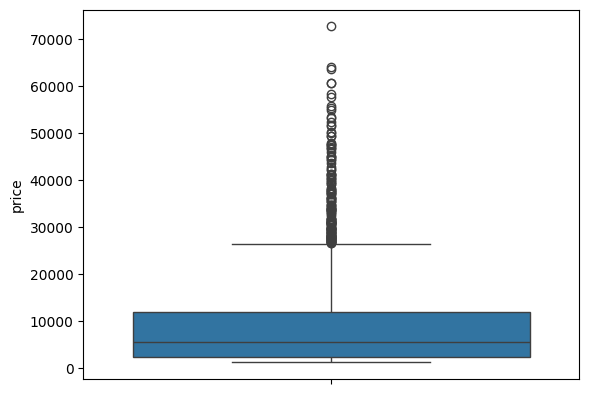

In [66]:
sns.boxplot(df['price'])

<Axes: >

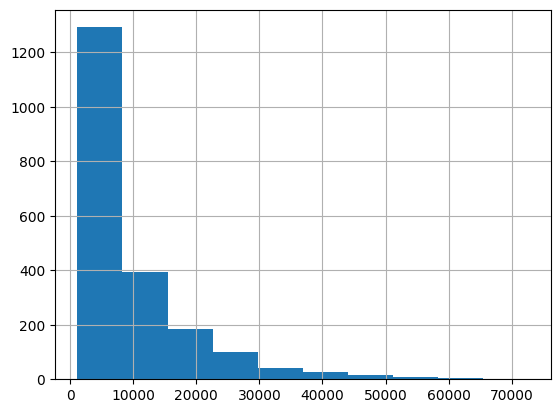

In [67]:
df['price'].hist()

In [68]:
df['price'].describe()

count     2068.000000
mean      9182.621857
std       9964.093618
min       1140.000000
25%       2323.750000
50%       5448.500000
75%      11946.750000
max      72641.000000
Name: price, dtype: float64

# Exporting to database again

In [140]:
df.to_sql("Car_Sellings", engine, index= False)

C:\Users\hp\AppData\Local\Temp\ipykernel_15528\2607433363.py:1: UserWarning: The provided table name 'Car_Sellings' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  df.to_sql("Car_Sellings", engine, index= False)


2068